In [ ]:
pip install xmltodict

In [ ]:
import requests
import xmltodict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import skimage.io
import json
import textblob
import nltk
nltk.download('punkt')

# function to display all background data fetched from omdb api
def background(moviedatainxml):
  print(" Year : ",moviedatainxml["root"]["movie"]["@year"])
  print(" Rated : ",moviedatainxml["root"]["movie"]["@rated"])
  print(" Runtime : ",moviedatainxml["root"]["movie"]["@runtime"])
  print(" Genre : ",moviedatainxml["root"]["movie"]["@genre"])
  print(" Actors : ",moviedatainxml["root"]["movie"]["@actors"])
  print(" Plot : ",moviedatainxml["root"]["movie"]["@plot"])
  return

# function to display all awards data fetched from omdb api
def reception(moviedatainxml):
  print(" Awards : ",moviedatainxml["root"]["movie"]["@awards"])
  print(" Metascore : ",moviedatainxml["root"]["movie"]["@metascore"])
  print(" IMDb Ratings : ",moviedatainxml["root"]["movie"]["@imdbRating"])
  return

# function to display the poster posted on omdb website
def poster(moviedatainxml):
  try:
    url = moviedatainxml["root"]["movie"]["@poster"]
    image = skimage.io.imread(url)
    plt.imshow(image, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
  except:
    print("Sorry, no poster available")
  return

# function to diplay wordcloud of words in all the reviews posted on New York Times Movie Review 
def wordcloudart(reqtext):
  try:
    moviedatainjson = json.loads(reqtext)
    if not moviedatainjson:
      print("moviedatainjson is empty")
    text = ""
    for i in moviedatainjson["results"]:
      if not i["summary_short"]:
        print("empty")
      text += i["summary_short"]
    cloud = WordCloud()
    cloud.generate(text)
    plt.imshow(cloud, interpolation= "bilinear")      
    plt.axis("off")
    plt.show()
  except:
    print("Sorry, no reviews available. Hence no wordcloud formed. ")
  return

# function to display average sentiments that are generated from all the reviews posted on New York Times Movie Review
def sentiment(reqtext):
  try:
    polarity = 0
    subjectivity = 0
    moviedatainjson = json.loads(reqtext)
    text = ""
    reviewcount = 0
    for i in moviedatainjson["results"]:
      text += i["summary_short"]
    text1 = textblob.TextBlob(text)
    for i in text1.sentences:
      polarity += i.polarity
      subjectivity += i.subjectivity
      reviewcount += 1
    print("Average New York Times Polarity = ",polarity/reviewcount)
    print("Average New York Times Subjectivity = ",subjectivity/reviewcount)
  except:
    print("Sorry, no reviews available. Hence no polarity and subjectivity available")
  return

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Welcome to the movie analytics tool!
What movie would you like to analyze? Deadpool
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? backgrnd
 Year :  2016
 Rated :  R
 Runtime :  108 min
 Genre :  Action, Adventure, Comedy, Sci-Fi
 Actors :  Ryan Reynolds, Karan Soni, Ed Skrein, Michael Benyaer
 Plot :  A wisecracking mercenary gets experimented on and becomes immortal but ugly, and sets out to track down the man who ruined his looks.
Would you like to further analyze this movie (yes/no)? Yess
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? Reception
 Awards :  Nominated for 2 Golden Globes. Another 28 wins & 76 nominations.
 Metascore :  65
 IMDb Ratings :  8.0
Would you like to further analyze this movie (yes/no)? YES
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? POSTER


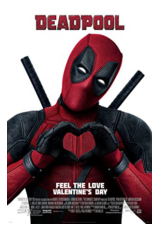

Would you like to further analyze this movie (yes/no)? yes
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? Wordcloud


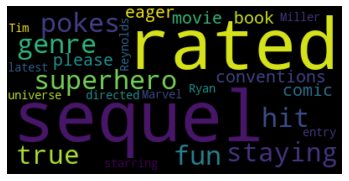

Would you like to further analyze this movie (yes/no)? yes
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? Sentimentt
Average New York Times Polarity =  0.3833333333333333
Average New York Times Subjectivity =  0.5833333333333334
Would you like to further analyze this movie (yes/no)? yes
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? box office
Sorry, that analysis is not supported. Please try again with the options mentioned. 
Would you like to further analyze this movie (yes/no)? no
Would you like to further analyze another movie (yes/no)? yes
What movie would you like to analyze? casablanca
What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? Background
 Year :  1942
 Rated :  PG
 Runtime :  102 min
 Genre :  Drama, Romance, War
 Actors :  Humphrey Bogart, Ingrid Bergman, Paul Henreid, Claude Rains
 Plot :  A cynical expatriate Am

In [10]:
# Main code of the program starts here
print("Welcome to the movie analytics tool!")
outerloop_fix = "yes"
omdbkey = "c0a626b9"
nytkey = "on0yYkLjlJlgI300Wr0Mbf765VUtrNo2"
omdblink = 'https://www.omdbapi.com/?r=xml&apikey='+omdbkey+'&t='
nytlink = 'https://api.nytimes.com/svc/movies/v2/reviews/search.json?api-key='+nytkey+'&query='

# loop for user to input different movies
while outerloop_fix == 'yes':
  movie_name0 = input("What movie would you like to analyze? ")
    
  req1 = requests.get(omdblink + movie_name0)
  req2 = requests.get(nytlink + movie_name0)
  
  # checking the connections with the movie option
  if req1.status_code == 200 and req2.status_code == 200:
    movie_data = req1.text
    datainxml = xmltodict.parse(movie_data)
    
    # condition to check if the movie exists or not
    if datainxml["root"]["@response"] == 'True':
      innerloop_fix = "yes"      
      
      # loop for user to select the option for the chosen movie
      while innerloop_fix == 'yes':
        m_type = input("What about the film would you like to see (Background / Reception / Poster / Wordcloud / Sentiment)? ").lower()
        
        # correcting the movie analytics option for small spelling mistake if any
        movieanalytictype = textblob.TextBlob(m_type)
        m_type_fix = movieanalytictype.correct()
        
        if m_type_fix == 'background':
          # function to display all background data fetched from omdb api
          background(datainxml)
        
        elif m_type_fix == 'reception':
          # function to display all awards data fetched from omdb api
          reception(datainxml)
          
        elif m_type_fix == 'poster':
          # function to display the poster posted on omdb website
          poster(datainxml)
          
        elif m_type_fix == 'wordcloud':
          # function to diplay wordcloud of words in all the reviews posted on New York Times Movie Review 
          wordcloudart(req2.text)
          
        elif m_type_fix == 'sentiment':
          # function to display average sentiments that are generated from all the reviews posted on New York Times Movie Review
          sentiment(req2.text)
          
        else:
          print("Sorry, that analysis is not supported. Please try again with the options mentioned. ")
        
        innerloop = input("Would you like to further analyze this movie (yes/no)? ").lower()
        
        # correcting the innerloop input for small spelling mistake if any
        inner = textblob.TextBlob(innerloop)
        innerloop_fix = inner.correct()     
    else:
      print("ERROR! Please check the spelling of the movie. If spelling is correct, movie does not exist in our database.")
  else:
    print("Error! No connection. Please try again later. ") 
  outerloop = input("Would you like to further analyze another movie (yes/no)? ").lower()
  outer = textblob.TextBlob(outerloop)
  outerloop_fix = outer.correct()
print("Thank you for using movie analytics tool. See you soon again.")